 # Exploratory Data Analysis of listings Data Frame

In [1]:
import pandas as pd
import seaborn as sns


In [2]:
# import clean dataset
listings_df = pd.read_pickle("data-clean/listings.pkl")


In [3]:
# Start with Subset of columns
cols = [
    "price",
    "neighbourhood",
    "room_type",
    "minimum_nights",
    "number_of_reviews",
    "reviews_per_month",
    "availability_365",
]
listings_red = listings_df[cols]



## Which neighbourhoods are most expensive?

In [4]:
price_by_nbhood = (
    listings_red.groupby("neighbourhood")
    .agg({"price": ["min", "mean", "max"]})
    .droplevel(level=0, axis="columns")
    .sort_values(by="mean", ascending=False)
)
price_by_nbhood


,min,mean,max
neighbourhood,,,
"Sentrum, Oslo, Norway",516.0,2067.280000,21843.0
"Bærum, Akershus, Norway",1949.0,1949.000000,1949.0
"Holmenkollen, Oslo, Norway",480.0,1555.230769,6000.0
"Ris, Oslo, Norway",660.0,1515.333333,2500.0
"Skøyen, Oslo, Norway",1500.0,1500.000000,1500.0
"Nordstrand, Oslo, Norway",300.0,1451.615385,8000.0
"Sagene, Oslo, Norway",350.0,1429.357143,15071.0
"Frogner, Oslo, Norway",250.0,1392.072464,10126.0
"Sankt Hanshaugen, Oslo, Norway",270.0,1381.105263,15000.0


Text(0.5, 0.98, 'Log-Price Distribution')

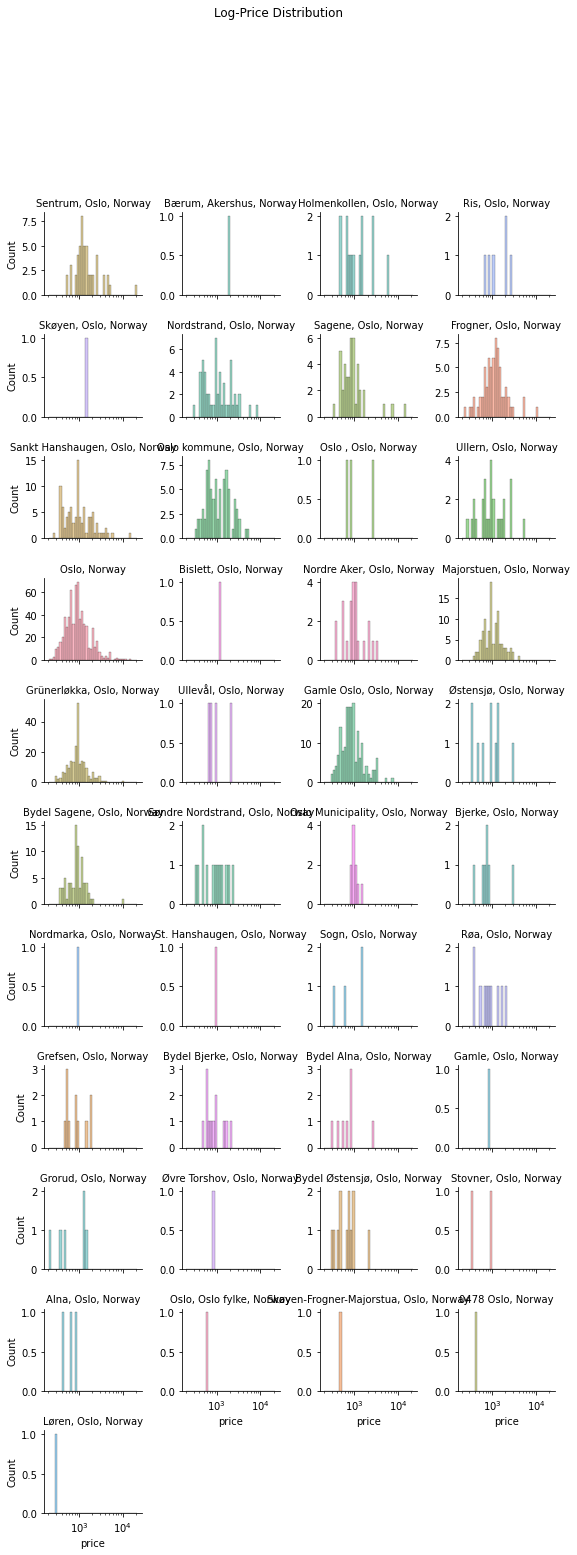

In [10]:
g = sns.displot(
    data=listings_red.loc[listings_red["price"] > 0],
    kind="hist",
    x="price",
    hue="neighbourhood",
    col="neighbourhood",
    col_wrap=4,
    log_scale=True,
    facet_kws=dict(sharey=False),
    legend=False,
    height=2,
    aspect=1,
    col_order=price_by_nbhood.index,
).set_titles(col_template="{col_name}")

fig = g.figure
fig.subplots_adjust(top=0.85)
fig.suptitle("Log-Price Distribution")


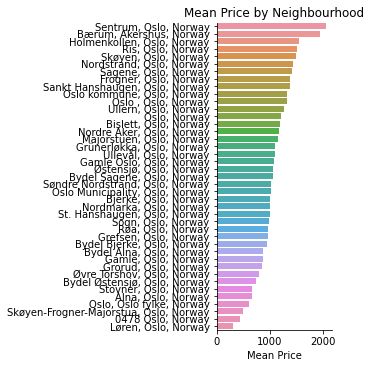

In [6]:
(
    sns.catplot(
        data=price_by_nbhood.reset_index(), kind="bar", x="mean", y="neighbourhood"
    )
    .set_axis_labels(x_var="Mean Price", y_var="")
    .set(title="Mean Price by Neighbourhood")
)


In [7]:
price_by_roomtype = (
    listings_red.groupby("room_type")
    .agg({"price": ["min", "mean", "max"]})
    .droplevel(level=0, axis="columns")
    .sort_values(by="mean", ascending=False)
)


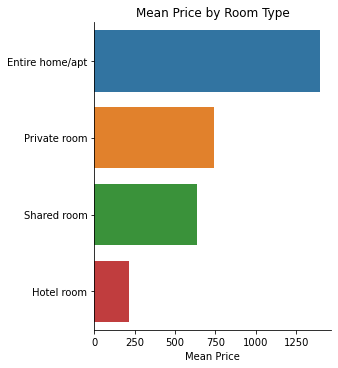

In [8]:
(
    sns.catplot(
        data=price_by_roomtype.reset_index(), kind="bar", x="mean", y="room_type"
    )
    .set_axis_labels(x_var="Mean Price", y_var="")
    .set(title="Mean Price by Room Type")
)


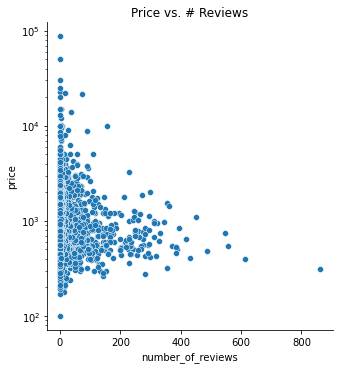

In [9]:
sns.relplot(
    kind="scatter",
    data=listings_red.loc[listings_red["price"] > 0],
    x="number_of_reviews",
    y="price",
).set(yscale="log", title="Price vs. # Reviews")
